# Тема: Классификация

## Импорты

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSmGmYZwQzJztIBGyV2s0ExKtoHYXODwI8_B9tDWwYQf78IARnPKiWs0rhKkkrs8SgpB_tbTWHqAfyz/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")
df.keys()

Балакин Даниил ИНБО-02-21


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
cols_to_check = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

# Удаляем строки, где в указанных столбцах содержится "?"
df_cleaned = df.copy()
for col in cols_to_check:
  df_cleaned = df_cleaned[df_cleaned[col] != '?']

print("Балакин Даниил ИНБО-02-21")
print(f"Количество строк до очистки: {len(df)}")
print(f"Количество строк после очистки: {len(df_cleaned)}")

df = df_cleaned
df.head(10)

Балакин Даниил ИНБО-02-21
Количество строк до очистки: 205
Количество строк после очистки: 159


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,03.03,9.5,48,5100,47,53,5151
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,03.03,3.11,9.6,70,5400,38,43,6295


## Задание №1
Найти данные для классификации.
Предобработать данные, если это необходимо.

In [ ]:
print("Балакин Даниил ИНБО-02-21")
pd.set_option('display.max_columns', None)

df.head(10) #Предикаты: все остальное
            #Цедлевая: body-style
target = df["body-style"].replace({"convertible": 1, "hatchback": 2, "sedan": 3, "wagon": 4, "hardtop": 5})


target = target


#toyota nissan	mazda	mitsubishi honda	volkswagen	subaru	peugot	volvo	dodge	mercedes-benz	bmw	plymouth audi	saab	porsche	jaguar	chevrolet	alfa-romero	isuzu	renault	mercury


columns_to_drop = ['body-style']

predicators = df.drop(columns=columns_to_drop)
predicators["num-of-cylinders"] = predicators["num-of-cylinders"].replace({"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
predicators["drive-wheels"] = predicators["drive-wheels"].replace({"fwd": 1, "rwd": 2, "4wd": 4})
predicators["engine-location"] = predicators["engine-location"].replace({"front": 1, "rear": 2})
predicators["aspiration"] = predicators["aspiration"].replace({"std": 1, "turbo": 2})
predicators["make"] = predicators["make"].replace({"toyota": 1, "nissan": 2, "mazda": 3, "mitsubishi": 4,
                         "honda": 5, "volkswagen": 6, "subaru": 7, "peugot": 8,
                         "volvo": 9, "dodge": 10, "mercedes-benz": 11, "bmw": 12,
                         "plymouth": 13, "audi": 14, "saab": 15,
                         "porsche": 16, "jaguar": 17, "chevrolet": 18, "alfa-romero": 19, "isuzu": 20, "renault": 21, "mercury": 22})

predicators["fuel-type"] = predicators["fuel-type"].replace({"gas": 1, "diesel": 2})
predicators["num-of-doors"] = predicators["num-of-doors"].replace({"two": 2, "four": 4})
predicators["engine-type"] = predicators["engine-type"].replace({"ohc": 1, "ohcf": 2, "l": 3, "dohc": 4, "ohcv": 5})
predicators['fuel-system'] = predicators['fuel-system'].replace({"mpfi": 1, "2bbl": 2, "mfi": 3, "1bbl": 4, "spdi": 5, "idi": 6})
predicators['bore'] = predicators['bore'].astype(float)
predicators['stroke'] = predicators['stroke'].astype(float)
predicators['horsepower'] = predicators['horsepower'].astype(float)
predicators['peak-rpm'] = predicators['peak-rpm'].astype(float)
predicators['city-mpg'] = predicators['city-mpg'].astype(float)
predicators['highway-mpg'] = predicators['highway-mpg'].astype(float)
predicators['normalized-losses'] = predicators['normalized-losses'].astype(float)
predicators['price'] = predicators['price'].astype(float)
predicators['curb-weight'] = predicators['curb-weight'].astype(float)
predicators['length'] = predicators['length'].astype(float)
predicators['width'] = predicators['width'].astype(float)
predicators['height'] = predicators['height'].astype(float)
predicators['wheel-base'] = predicators['wheel-base'].astype(float)
#predicators['engine-type'].value_counts()

#target.value_counts()
#target.head(10)
#df.keys()

Балакин Даниил ИНБО-02-21


<ipython-input-4-5c05b5c1f540>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = df["body-style"].replace({"convertible": 1, "hatchback": 2, "sedan": 3, "wagon": 4, "hardtop": 5})
<ipython-input-4-5c05b5c1f540>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicators["num-of-cylinders"] = predicators["num-of-cylinders"].replace({"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
<ipython-input-4-5c05b5c1f540>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

## Задание №2
Изобразить гистограмму, которая показывает баланс классов. Сделать
выводы.

Балакин Даниил ИНБО-02-21


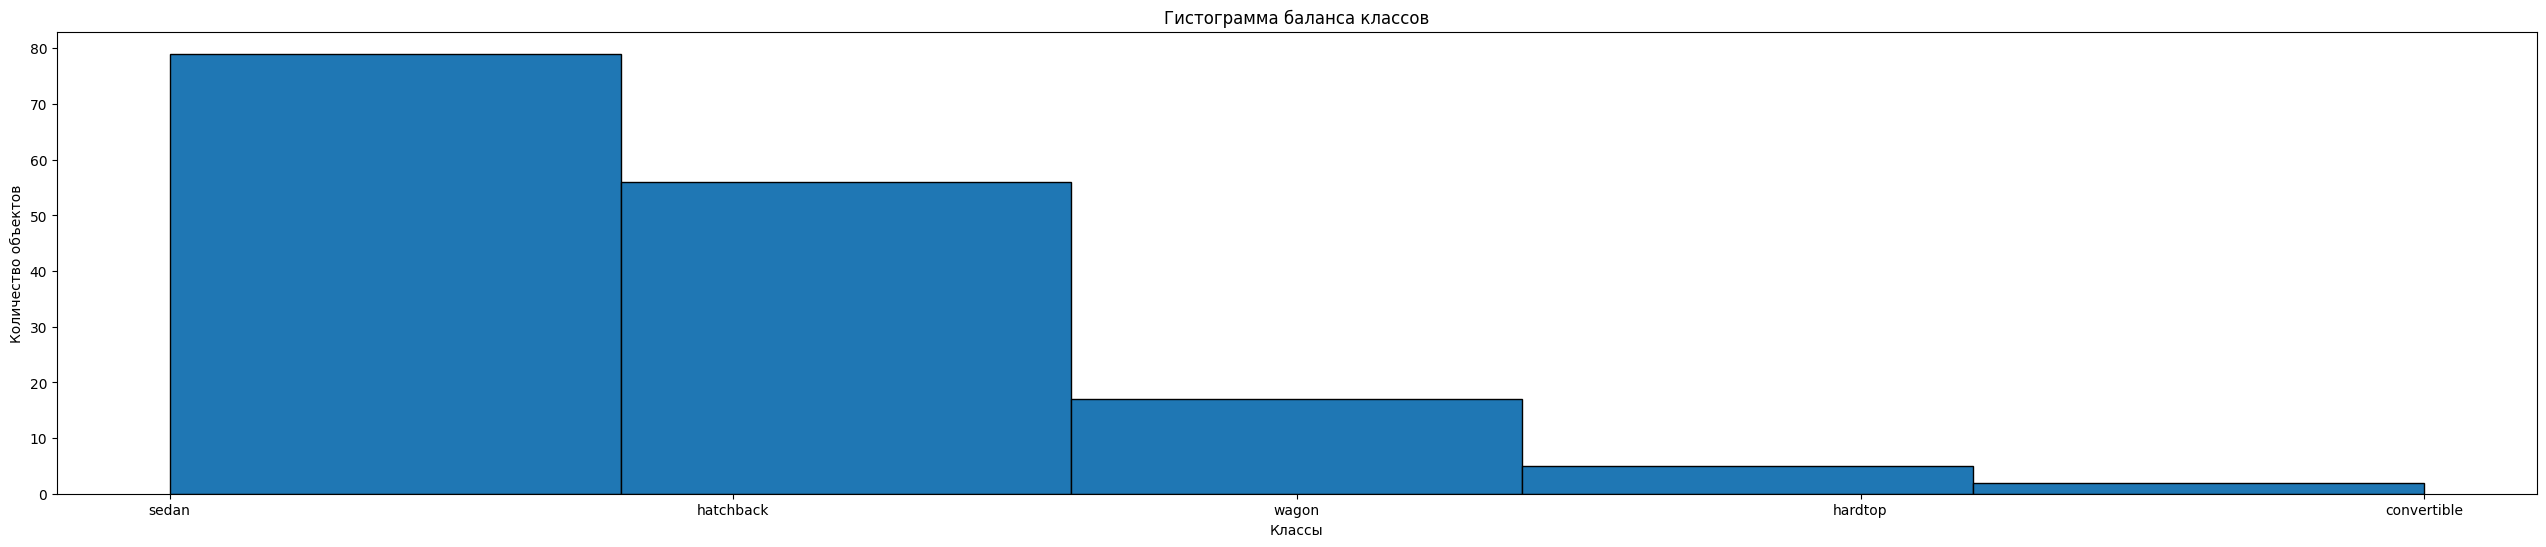

In [ ]:
print("Балакин Даниил ИНБО-02-21")
plt.figure(figsize=(32, 6))
plt.hist(df['body-style'], bins=len(df['body-style'].unique()), edgecolor='black')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.title('Гистограмма баланса классов')
plt.show()

### Вывод:
Из гистограммы видно, что распределение классов в выборке неравномерно.
Некоторые классы, например, Toyota, имеют значительно большее количество объектов, чем другие.
Это может повлиять на качество обучения модели, так как модель может быть смещена в сторону более крупных классов.
Необходимо учитывать дисбаланс классов при выборе модели и метрик оценки качества.
Возможно, потребуется использовать методы балансировки классов, например, oversampling или undersampling.

## Задание №3
Разбить выборку на тренировочную и тестовую. Тренировочная для
обучения модели, тестовая для проверки ее качества.

In [ ]:
print("Балакин Даниил ИНБО-02-21")
X_train, X_test, Y_train, Y_test = train_test_split(predicators, target, test_size=0.8, random_state=271)
print('Размер для признаков обучающей выборки = ', X_train.shape)
print('Размер для признаков тестовой выборки = ', X_test.shape)
print('Размер для целевого показателя обучающей выборки = ', Y_train.shape)
print('размер для показателя тестовтой выборки = ', Y_test.shape)

Балакин Даниил ИНБО-02-21
Размер для признаков обучающей выборки =  (31, 25)
Размер для признаков тестовой выборки =  (128, 25)
Размер для целевого показателя обучающей выборки =  (31,)
размер для показателя тестовтой выборки =  (128,)


## Задание  №4
Применить алгоритмы классификации: логистическая регрессия, SVM,
KNN. Построить матрицу ошибок по результатам работы моделей

In [ ]:
print("Балакин Даниил ИНБО-02-21")
model = LogisticRegression(random_state = 271)
model.fit(X_train, Y_train)
y_prdict = model.predict(X_test)
print('Предсказанные значения: \n', y_prdict)
print('Исходные значения: \n', np.array(Y_test))

Балакин Даниил ИНБО-02-21
Предсказанные значения: 
 [3 2 2 3 2 3 2 2 3 3 2 3 3 3 2 4 4 2 2 3 3 4 3 3 3 2 2 3 3 3 2 3 4 2 3 5 3
 2 2 2 2 2 5 3 2 3 3 4 2 2 2 3 2 2 3 5 3 2 3 3 2 3 2 3 3 3 3 5 2 5 3 3 2 3
 3 2 3 2 2 5 3 3 3 3 2 3 3 5 3 2 4 3 3 5 3 3 2 5 3 5 3 2 3 2 2 3 3 5 3 3 4
 4 3 3 4 3 3 2 3 3 2 3 2 4 5 2 4 2]
Исходные значения: 
 [3 2 2 3 2 3 3 2 3 4 3 2 3 4 3 2 4 2 2 3 5 2 3 3 3 3 2 2 2 4 3 3 3 3 3 3 2
 3 2 2 3 4 2 3 2 2 3 3 2 3 3 1 3 2 3 1 3 5 3 2 2 3 2 2 3 3 3 3 2 2 2 2 2 3
 3 5 3 3 3 2 3 2 3 2 2 3 2 3 3 3 4 2 4 2 3 3 3 2 3 3 3 5 2 2 2 3 3 2 2 3 3
 4 2 2 4 2 3 2 3 3 3 3 3 4 3 2 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Балакин Даниил ИНБО-02-21 Модель лог. регрессия")
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(Y_test, y_prdict), text_auto=True)
fig.update_layout(xaxis_title = "target", yaxis_title = "predicted")
fig.show()

Балакин Даниил ИНБО-02-21 Модель лог. регрессия


In [ ]:
print("Балакин Даниил ИНБО-02-21")
param_kerlen = ('linear', 'poly', 'rbf', 'sigmoid')
parameters = {'kernel': param_kerlen}
model = SVC()
grid__search_svm = GridSearchCV(estimator = model, param_grid = parameters, scoring='accuracy', cv=3)
grid__search_svm.fit(X_train, Y_train)

Балакин Даниил ИНБО-02-21


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [ ]:
print("Балакин Даниил ИНБО-02-21")
best_model = grid__search_svm.best_estimator_
best_model.kernel

Балакин Даниил ИНБО-02-21


'linear'

In [ ]:
print("Балакин Даниил ИНБО-02-21")
svm_pred = best_model.predict(X_test)

Балакин Даниил ИНБО-02-21


In [ ]:
print("Балакин Даниил ИНБО-02-21 Модель SVM")
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(Y_test, svm_pred), text_auto=True)
fig.update_layout(xaxis_title = "target", yaxis_title = "predicted")
fig.show()

Балакин Даниил ИНБО-02-21 Модель SVM


In [ ]:
namber_of_neighbours = (3, 5, 7, 9, 11, 13, 15)
model_KNN = KNeighborsClassifier()
parameters = {'n_neighbors': namber_of_neighbours}
grid__search_KNN = GridSearchCV(estimator = model_KNN, param_grid = parameters, scoring='accuracy', cv=5)

In [ ]:
grid__search_KNN.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 5, 7, 9, 11, 13, 15)},
             scoring='accuracy')

In [ ]:
grid__search_KNN.best_score_

0.5238095238095238

In [ ]:
grid__search_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [ ]:
KNN_pred = grid__search_KNN.predict(X_test)

In [ ]:
print("Балакин Даниил ИНБО-02-21 Модель KNN")
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(Y_test, KNN_pred), text_auto=True)
fig.update_layout(xaxis_title = "target", yaxis_title = "predicted")
fig.show()

Балакин Даниил ИНБО-02-21 Модель KNN


## Задание №5
Сравнить результаты классификации, используя accuracy, precision,
recall и f1-меру (можно использовать classification_report из
sklearn.metrics). Сделать выводы

In [ ]:
print("Балакин Даниил ИНБО-02-21")
print("Модель логистической регрессии:")
print(classification_report(Y_test, y_prdict))
print("\nМодель SVM:")
print(classification_report(Y_test, svm_pred))
print("\nМодель KNN:")
print(classification_report(Y_test, KNN_pred))


Балакин Даниил ИНБО-02-21
Модель логистической регрессии:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.49      0.45      0.47        47
           3       0.61      0.58      0.60        65
           4       0.45      0.50      0.48        10
           5       0.00      0.00      0.00         4

    accuracy                           0.50       128
   macro avg       0.31      0.31      0.31       128
weighted avg       0.53      0.50      0.51       128


Модель SVM:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.63      0.40      0.49        47
           3       0.57      0.62      0.59        65
           4       0.33      0.60      0.43        10
           5       0.00      0.00      0.00         4

    accuracy                           0.51       128
   macro avg       0.31      0.32      0.30       128
weight

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

# Вывод:
Модель SVM показывает наилучший результат по метрике accuracy, также модель SVM имеет более высокое значение precision для некоторых классов.

Модель KNN имеет более низкие показатели по всем метрикам.
В целом, модель SVM может быть предпочтительнее для данной задачи, так как она обеспечивает наилучший баланс между accuracy, precision и recall.
